In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import os

PATH_TO_DATA = os.getcwd()
PATH_TO_DATA = PATH_TO_DATA[:-PATH_TO_DATA[::-1].find("/")]
PATH_TO_DATA += "data/6-months/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
btc_df = pd.read_csv(PATH_TO_DATA + "Binance_BTCUSDT_4h_1 Sep, 2018-1 Mar, 2019.csv", sep='\t')
btc_df.shape

(1086, 7)

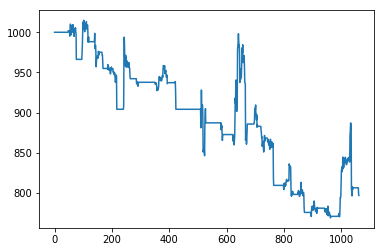

In [3]:
from strategies import MovingAverage
balance = MovingAverage().ma_cross_strategy(btc_df["open"].values, 13, 25)
plt.plot(range(len(balance)), balance)

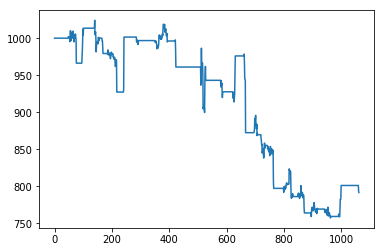

In [4]:
balance = MovingAverage().ma_cross_strategy_sltp(btc_df["open"].values, 13, 25)
plt.plot(range(len(balance)), balance)

In [5]:
def simple_grid_search_sltp(data, params, f, metrics='last', family="sma"):
    scores_df = pd.DataFrame(columns=["stop_loss", "take_profit", "score"])
    sl_start = params[0]
    sl_stop = params[1]
    tp_start   = params[2]
    tp_stop   = params[3]
    i = 0
    if (metrics == 'last'):
        for sl in np.arange(sl_start, sl_stop, 0.02):
            for tp in np.arange(tp_start, tp_stop, 0.02):
                balance = f(data, stop_loss=sl, take_profit=tp, family=family)
                score = balance[-1]
                scores_df.loc[i] = [sl, tp, score]
                i += 1
            
    return scores_df

In [22]:
df = simple_grid_search_sltp(btc_df["open"].values, params=(0.02, 0.20, 0.02, 0.20), 
                        f=MovingAverage().ma_cross_strategy_sltp, family="ema")
df.sort_values(by=['score'], inplace=True, ascending=False)
df.head()

,stop_loss,take_profit,score
9,0.04,0.02,1056.024845
10,0.04,0.04,1054.349082
16,0.04,0.16,1054.349082
15,0.04,0.14,1054.349082
14,0.04,0.12,1054.349082


In [15]:
df["sign"] = np.sign(df["stop_loss"] - df["take_profit"]) #stop_loss < take_profit?
print(mean(df[df["sign"] > 0]["score"]))
print(mean(df[df["sign"] < 0]["score"]))

898.6664347205409
962.3187061482139


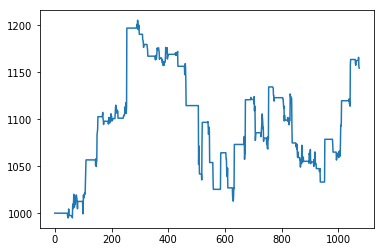

In [26]:
balance = MovingAverage().ma_cross_strategy_sltp(btc_df["open"].values, 
                                                 fast_h=5, slow_h=13, 
                                                 stop_loss=0.04, take_profit=0.08)
plt.plot(range(len(balance)), balance)

In [13]:
def simple_grid_search(data, params, f, metrics='last', family="sma"):
    scores_df = pd.DataFrame(columns=["fast_h", "slow_h", "score"])
    start_fast = params[0]
    start_slow = params[1]
    end_slow   = params[2]
    i = 0
    if (metrics == 'last'):
        for slow in range(start_slow, end_slow):
            for fast in range(start_fast, slow):
                balance = f(data, fast, slow, family=family)
                score = balance[-1]
                scores_df.loc[i] = [fast, slow, score]
                i += 1
            
    return scores_df

In [9]:
#import os
#os.sys.path
#parent_path = os.getcwd()[:-12]
#os.sys.path.append(parent_path)
#os.sys.path

In [10]:
df = simple_grid_search(btc_df["open"].values, params=(1, 4, 25), 
                        f=MovingAverage().ma_cross_strategy, family="sma")
df.sort_values(by=['score'], inplace=True, ascending=False)
df.head()

,fast_h,slow_h,score
106,5.0,16.0,1029.408577
247,20.0,23.0,1016.950456
92,5.0,15.0,1015.066947
79,5.0,14.0,1012.285109
268,19.0,24.0,1001.653481


In [11]:
df = simple_grid_search(btc_df["open"].values, params=(1, 4, 25), 
                        f=MovingAverage().ma_cross_strategy, family="ema")
df.sort_values(by=['score'], inplace=True, ascending=False)
df.head()

,fast_h,slow_h,score
68,6.0,13.0,852.897366
58,7.0,12.0,852.797154
65,3.0,13.0,849.524127
41,9.0,10.0,848.825776
92,5.0,15.0,848.800305
